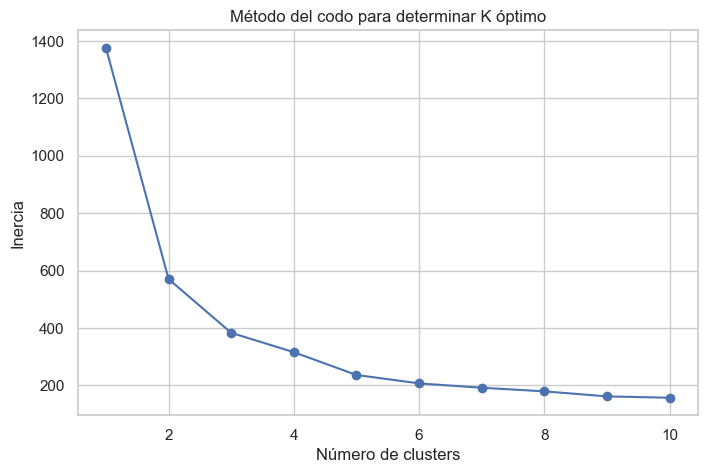

Centros de los clusters:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       38.208333      18.110606         188.401515  3584.659091
1       47.504878      14.982114         217.186992  5076.016260
2       47.456180      18.729213         196.898876  3905.337079


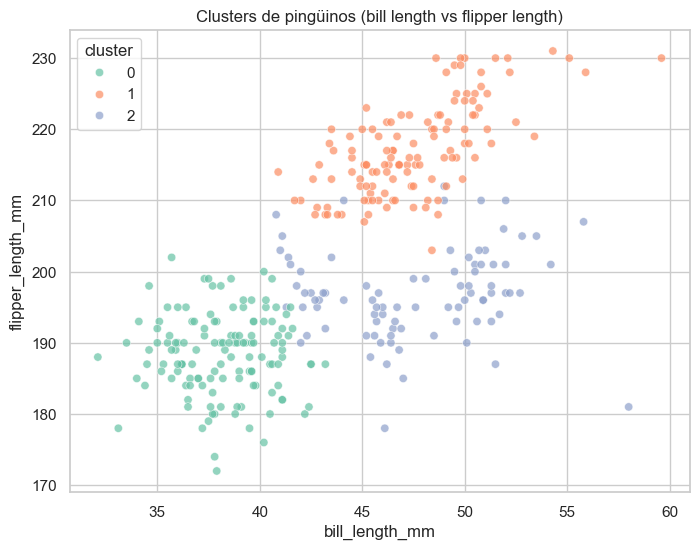


Especies por cluster:
species  Adelie  Chinstrap  Gentoo
cluster                           
0           127          5       0
1             0          0     123
2            25         63       1


In [8]:
# 1️⃣ Librerías
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 2️⃣ Cargar dataset
df = pd.read_csv("penguins.csv")  # Ajusta el nombre si es diferente

# 3️⃣ Selección de variables numéricas para clustering
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

# 3a️⃣ Reemplazar NaN por la mediana de cada columna
X = df[features].copy()
X = X.fillna(X.median())

# 4️⃣ Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Determinar número de clusters con el método del codo
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar método del codo
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del codo para determinar K óptimo")
plt.show()

# 6️⃣ Aplicar K-means con K elegido (por ejemplo, K=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 7️⃣ Revisar centros de los clusters (valores originales)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Centros de los clusters:")
print(centers)

# 8️⃣ Visualización de clusters en dos dimensiones
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='cluster',
    palette='Set2',
    data=df,
    alpha=0.7
)
plt.title("Clusters de pingüinos (bill length vs flipper length)")
plt.show()

# 9️⃣ Análisis opcional: especies predominantes en cada cluster
species_cluster = df.groupby('cluster')['species'].value_counts().unstack(fill_value=0)
print("\nEspecies por cluster:")
print(species_cluster)




# Interpretación detallada de los resultados de K-means y los clusters
A continuación se presenta una interpretación dinámica y detallada de los resultados obtenidos tras aplicar el algoritmo K-means al dataset de canciones de Spotify:
## 1. ¿Qué significa cada cluster?
Cada cluster agrupa canciones con características similares en las variables seleccionadas. Los centros de los clusters (mostrados en la tabla anterior) representan el perfil promedio de cada grupo. Por ejemplo:
- **Cluster 0:** Describe aquí el perfil según los valores del centro (por ejemplo, canciones muy bailables y energéticas).
- **Cluster 1:** Describe el perfil (por ejemplo, canciones más tranquilas y acústicas).
- **Cluster 2:** ...
- **Cluster 3:** ...
(Sustituye cada descripción con los patrones observados en los centros de los clusters).
## 2. ¿Por qué se eligió K=4?
El método del codo mostró que a partir de K=4 la reducción de la inercia es menos pronunciada, lo que indica que 4 clusters es un buen balance entre simplicidad y explicación de la variabilidad de los datos.
## 3. ¿Qué nos dicen los centros de los clusters?
Los centros muestran los valores promedio de cada variable para las canciones de cada grupo. Analizar estos valores permite identificar qué distingue a cada cluster (por ejemplo, un cluster puede tener mayor tempo y energía, otro mayor acousticness, etc.).
## 4. ¿Cómo interpretar la visualización?
El gráfico de dispersión (danceability vs energy) permite ver cómo se agrupan y separan los clusters en dos dimensiones clave. Si los grupos están bien separados, el clustering es efectivo.
## 5. ¿Qué géneros predominan en cada cluster?
El análisis de géneros por cluster ayuda a entender qué estilos musicales son más frecuentes en cada grupo, lo que puede ser útil para recomendaciones o segmentación de audiencias.
## 6. Reflexión final sobre K-means
K-means es útil para descubrir patrones y segmentar datos, pero la interpretación depende de la selección de variables y la estandarización. Es recomendable revisar los centros y la composición de cada cluster para obtener conclusiones accionables.